In [1343]:
from __future__ import division

In [1442]:
np.random.uniform(-1, 1, 10)

array([-0.42804331,  0.35527264, -0.34696238,  0.90564365, -0.36967811,
       -0.7216336 ,  0.03651566,  0.6347701 ,  0.4015475 , -0.07162376])

In [ ]:
np.random.

In [ ]:
def create_train_data():
    w0 = 15
    w1 = -2
    x = np.random.uniform(0, 100, 100)
    y = w0 + w1 * x

In [1344]:
df = pd.read_csv('./ex1data1.txt')

In [1345]:
train_x = df.Population.values
train_y = df.Profit.values

In [1346]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


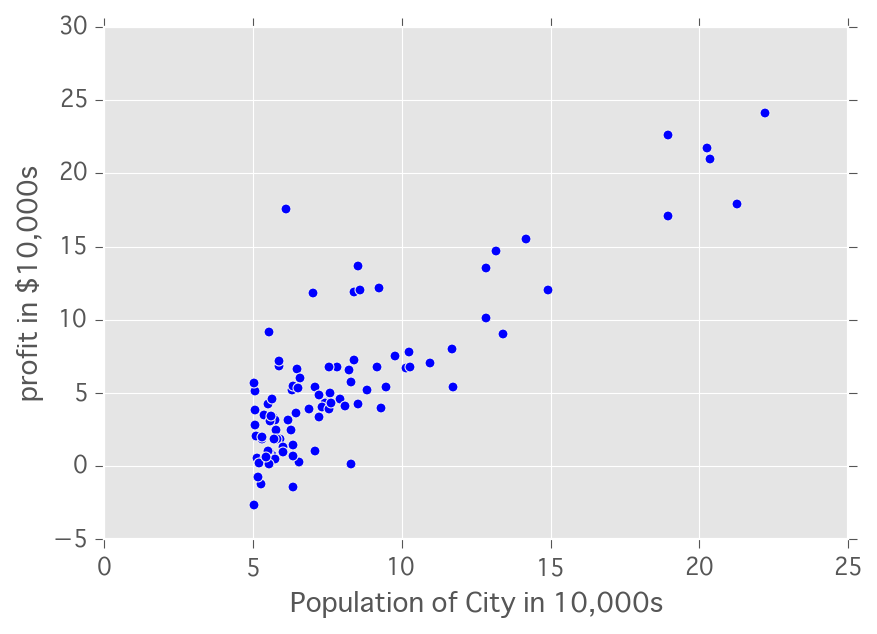

In [1347]:
plt.scatter(train_x, train_y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('profit in $10,000s')

$ y = w^{T}x = w_0 + w_1x$ に当てはめをする

この時の誤差関数は

$\displaystyle
E(w) = \frac{1}{2}\sum_{n=1}^{N}(y_n - w^Tx_n)^2$

となり

$E(w)$を最小化する $w$ を求めれば良い

In [1418]:
def calc_error(w, train_x, train_y):
    w = np.array(w)
    amount = 0
    for x, y in zip(train_x, train_y):
        x = np.array([1, x])
        amount += (y - w.T.dot(x))**2
    return amount/2

In [1427]:
def plot_errors(train_x, train_y):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    w0 = np.linspace(-25, 25, 150)
    w1 = np.linspace(-25, 25, 150)
    W0,W1 = np.meshgrid(w0, w1)
    E = []
    for w0i in w0:
        E.append([calc_error([w0i, w1i], train_x, train_y) for w1i in w1])

    plt.pcolor(W0, W1, np.array(E).T, cmap=plt.cm.jet, vmax=9000, vmin=1000)
    plt.colorbar()
    plt.ylim((-25, 25))
    plt.xlim((-25, 25))
    plt.xlabel('$w_0$')
    plt.ylabel('$w_1$')
    plt.title(u'$E(w)$')    

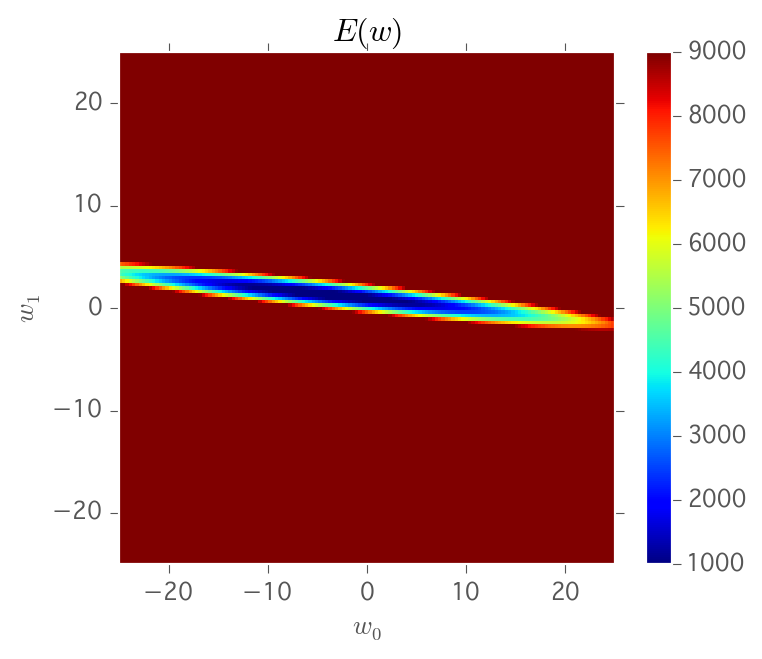

In [1428]:
plot_errors(train_x, train_y)

In [1341]:
def calc_gradient(w, train_x, train_y):
    """
    勾配を求める
    """
    dw = 1
    w0 = [w[0] - dw, w[0], w[0] + dw]
    w1 = [w[1] - dw, w[1], w[1] + dw]
    W0,W1 = np.meshgrid(w0, w1)
    E = []
    for w0i in w0:
        E.append([calc_error([w0i, w1i], train_x, train_y) for w1i in w1])
    (Ey, Ex) = np.gradient(np.array(E).T)
    return np.array((Ex[1][1], Ey[1][1]))

In [1430]:
np.gradient?

In [1246]:
w = [0, 0]
e = 0.005

In [1337]:
w = w - e*calc_gradient(w, train_x, train_y)
w

array([ -1.05054332e+14,  -1.59227874e+15])